# Stats from the scraped Pokemon's database
credits : https://pokemondb.net/

In [67]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 40

In [68]:
df = pd.read_csv('pokemon_db.csv', sep=";")
df.head()

,id_nb,name,type_1,type_2,link,data_species,data_height,data_weight,data_abilities,training_catch_rate,training_base_exp,training_growth_rate,breeding_gender,stats_hp,stats_attack,stats_defense,stats_sp_atk,stats_sp_def,stats_speed,stats_total
0,#001,Bulbasaur,Grass,Poison,/pokedex/bulbasaur,Seed Pokémon,0.7,6.9,Overgrow,45,64,Medium Slow,"87.5% male, 12.5% female",45,49,49,65,65,45,318
1,#002,Ivysaur,Grass,Poison,/pokedex/ivysaur,Seed Pokémon,1.0,13.0,Overgrow,45,142,Medium Slow,"87.5% male, 12.5% female",60,62,63,80,80,60,405
2,#003,Venusaur,Grass,Poison,/pokedex/venusaur,Seed Pokémon,2.0,100.0,Overgrow,45,236,Medium Slow,"87.5% male, 12.5% female",80,82,83,100,100,80,525
3,#004,Charmander,Fire,Nan,/pokedex/charmander,Lizard Pokémon,0.6,8.5,Blaze,45,62,Medium Slow,"87.5% male, 12.5% female",39,52,43,60,50,65,309
4,#005,Charmeleon,Fire,Nan,/pokedex/charmeleon,Flame Pokémon,1.1,19.0,Blaze,45,142,Medium Slow,"87.5% male, 12.5% female",58,64,58,80,65,80,405


In [69]:
df.id_nb = df.id_nb.apply(lambda x: int(x.replace('#', '')))
df.set_index('id_nb', inplace=True)

In [70]:
df.shape

(809, 19)

In [71]:
df.duplicated().sum()

0

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 1 to 809
Data columns (total 19 columns):
name                    809 non-null object
type_1                  809 non-null object
type_2                  809 non-null object
link                    809 non-null object
data_species            809 non-null object
data_height             809 non-null float64
data_weight             809 non-null float64
data_abilities          809 non-null object
training_catch_rate     809 non-null object
training_base_exp       809 non-null object
training_growth_rate    809 non-null object
 breeding_gender        809 non-null object
stats_hp                809 non-null int64
stats_attack            809 non-null int64
stats_defense           809 non-null int64
stats_sp_atk            809 non-null int64
stats_sp_def            809 non-null int64
stats_speed             809 non-null int64
stats_total             809 non-null int64
dtypes: float64(2), int64(7), object(10)
memory usage: 126.4+ KB

In [73]:
df.rename(columns={' breeding_gender':'breeding_gender'}, inplace=True)

# Cleaning the data set

In [74]:
df['percentages'] = df.breeding_gender.apply(lambda x: (re.findall("\d+\.\d+", x)))
df.data_species = df.data_species.apply(lambda x: x.replace('Pokémon', '').replace(' ', ''))
df.tail()

,name,type_1,type_2,link,data_species,data_height,data_weight,data_abilities,training_catch_rate,training_base_exp,training_growth_rate,breeding_gender,stats_hp,stats_attack,stats_defense,stats_sp_atk,stats_sp_def,stats_speed,stats_total,percentages
id_nb,,,,,,,,,,,,,,,,,,,,
805,Stakataka,Rock,Steel,/pokedex/stakataka,Rampart,5.5,820.0,Beast Boost,30,257,Slow,Genderless,61,131,211,53,101,13,570,[]
806,Blacephalon,Fire,Ghost,/pokedex/blacephalon,Fireworks,1.8,13.0,Beast Boost,30,257,Slow,Genderless,53,127,53,151,79,107,570,[]
807,Zeraora,Electric,Nan,/pokedex/zeraora,Thunderclap,1.5,44.5,Volt Absorb,3,270,Slow,Genderless,88,112,75,102,80,143,600,[]
808,Meltan,Steel,Nan,/pokedex/meltan,HexNut,0.2,8.0,Magnet Pull,—,—,—,—,46,65,65,55,35,34,300,[]
809,Melmetal,Steel,Nan,/pokedex/melmetal,HexNut,2.5,800.0,Iron Fist,—,—,—,—,135,143,143,80,65,34,600,[]


In [75]:
col = df.columns
col

Index(['name', 'type_1', 'type_2', 'link', 'data_species', 'data_height',
       'data_weight', 'data_abilities', 'training_catch_rate',
       'training_base_exp', 'training_growth_rate', 'breeding_gender',
       'stats_hp', 'stats_attack', 'stats_defense', 'stats_sp_atk',
       'stats_sp_def', 'stats_speed', 'stats_total', 'percentages'],
      dtype='object')

In [76]:
for c in col:
    df.loc[(df[c] == 'Nan') | (df[c] == '—'), c] = np.nan

In [77]:
df.isnull().sum()

name                      0
type_1                    0
type_2                  404
link                      0
data_species              0
data_height               0
data_weight               0
data_abilities            0
training_catch_rate       2
training_base_exp         2
training_growth_rate      2
breeding_gender           2
stats_hp                  0
stats_attack              0
stats_defense             0
stats_sp_atk              0
stats_sp_def              0
stats_speed               0
stats_total               0
percentages               0
dtype: int64

In [78]:
#Keep only the rows with at least 18 non-NA values.
df = df.dropna(thresh=18)
df.tail(2)

,name,type_1,type_2,link,data_species,data_height,data_weight,data_abilities,training_catch_rate,training_base_exp,training_growth_rate,breeding_gender,stats_hp,stats_attack,stats_defense,stats_sp_atk,stats_sp_def,stats_speed,stats_total,percentages
id_nb,,,,,,,,,,,,,,,,,,,,
806,Blacephalon,Fire,Ghost,/pokedex/blacephalon,Fireworks,1.8,13.0,Beast Boost,30,257,Slow,Genderless,53.0,127.0,53.0,151.0,79.0,107.0,570.0,[]
807,Zeraora,Electric,NaN,/pokedex/zeraora,Thunderclap,1.5,44.5,Volt Absorb,3,270,Slow,Genderless,88.0,112.0,75.0,102.0,80.0,143.0,600.0,[]


In [79]:
df.isnull().sum()

name                      0
type_1                    0
type_2                  402
link                      0
data_species              0
data_height               0
data_weight               0
data_abilities            0
training_catch_rate       0
training_base_exp         0
training_growth_rate      0
breeding_gender           0
stats_hp                  0
stats_attack              0
stats_defense             0
stats_sp_atk              0
stats_sp_def              0
stats_speed               0
stats_total               0
percentages               0
dtype: int64

In [80]:
df.head()

,name,type_1,type_2,link,data_species,data_height,data_weight,data_abilities,training_catch_rate,training_base_exp,training_growth_rate,breeding_gender,stats_hp,stats_attack,stats_defense,stats_sp_atk,stats_sp_def,stats_speed,stats_total,percentages
id_nb,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,/pokedex/bulbasaur,Seed,0.7,6.9,Overgrow,45,64,Medium Slow,"87.5% male, 12.5% female",45.0,49.0,49.0,65.0,65.0,45.0,318.0,"[87.5, 12.5]"
2,Ivysaur,Grass,Poison,/pokedex/ivysaur,Seed,1.0,13.0,Overgrow,45,142,Medium Slow,"87.5% male, 12.5% female",60.0,62.0,63.0,80.0,80.0,60.0,405.0,"[87.5, 12.5]"
3,Venusaur,Grass,Poison,/pokedex/venusaur,Seed,2.0,100.0,Overgrow,45,236,Medium Slow,"87.5% male, 12.5% female",80.0,82.0,83.0,100.0,100.0,80.0,525.0,"[87.5, 12.5]"
4,Charmander,Fire,NaN,/pokedex/charmander,Lizard,0.6,8.5,Blaze,45,62,Medium Slow,"87.5% male, 12.5% female",39.0,52.0,43.0,60.0,50.0,65.0,309.0,"[87.5, 12.5]"
5,Charmeleon,Fire,NaN,/pokedex/charmeleon,Flame,1.1,19.0,Blaze,45,142,Medium Slow,"87.5% male, 12.5% female",58.0,64.0,58.0,80.0,65.0,80.0,405.0,"[87.5, 12.5]"


# Statistics

In [98]:
cat_feat = list(df.select_dtypes(include=['object']).columns)
cat_feat = cat_feat[:-2]
cat_feat

['name',
 'type_1',
 'type_2',
 'link',
 'data_species',
 'data_abilities',
 'training_catch_rate',
 'training_base_exp',
 'training_growth_rate']

In [82]:
num_feat = df.select_dtypes(include=['int64', 'float64']).columns#.remove('id_nb')
num_feat

Index(['data_height', 'data_weight', 'stats_hp', 'stats_attack',
       'stats_defense', 'stats_sp_atk', 'stats_sp_def', 'stats_speed',
       'stats_total'],
      dtype='object')

In [99]:
print(f"Pokemon's with a single type percentage = {df.type_2.isnull().sum()/df.shape[0]*100:.1f}%")

Pokemon's with a single type percentage = 49.8%


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(data=df, y="count", x="month_str", orient="v")
ax.set(xlabel="Months" , ylabel="Count", title="Count Across Month");

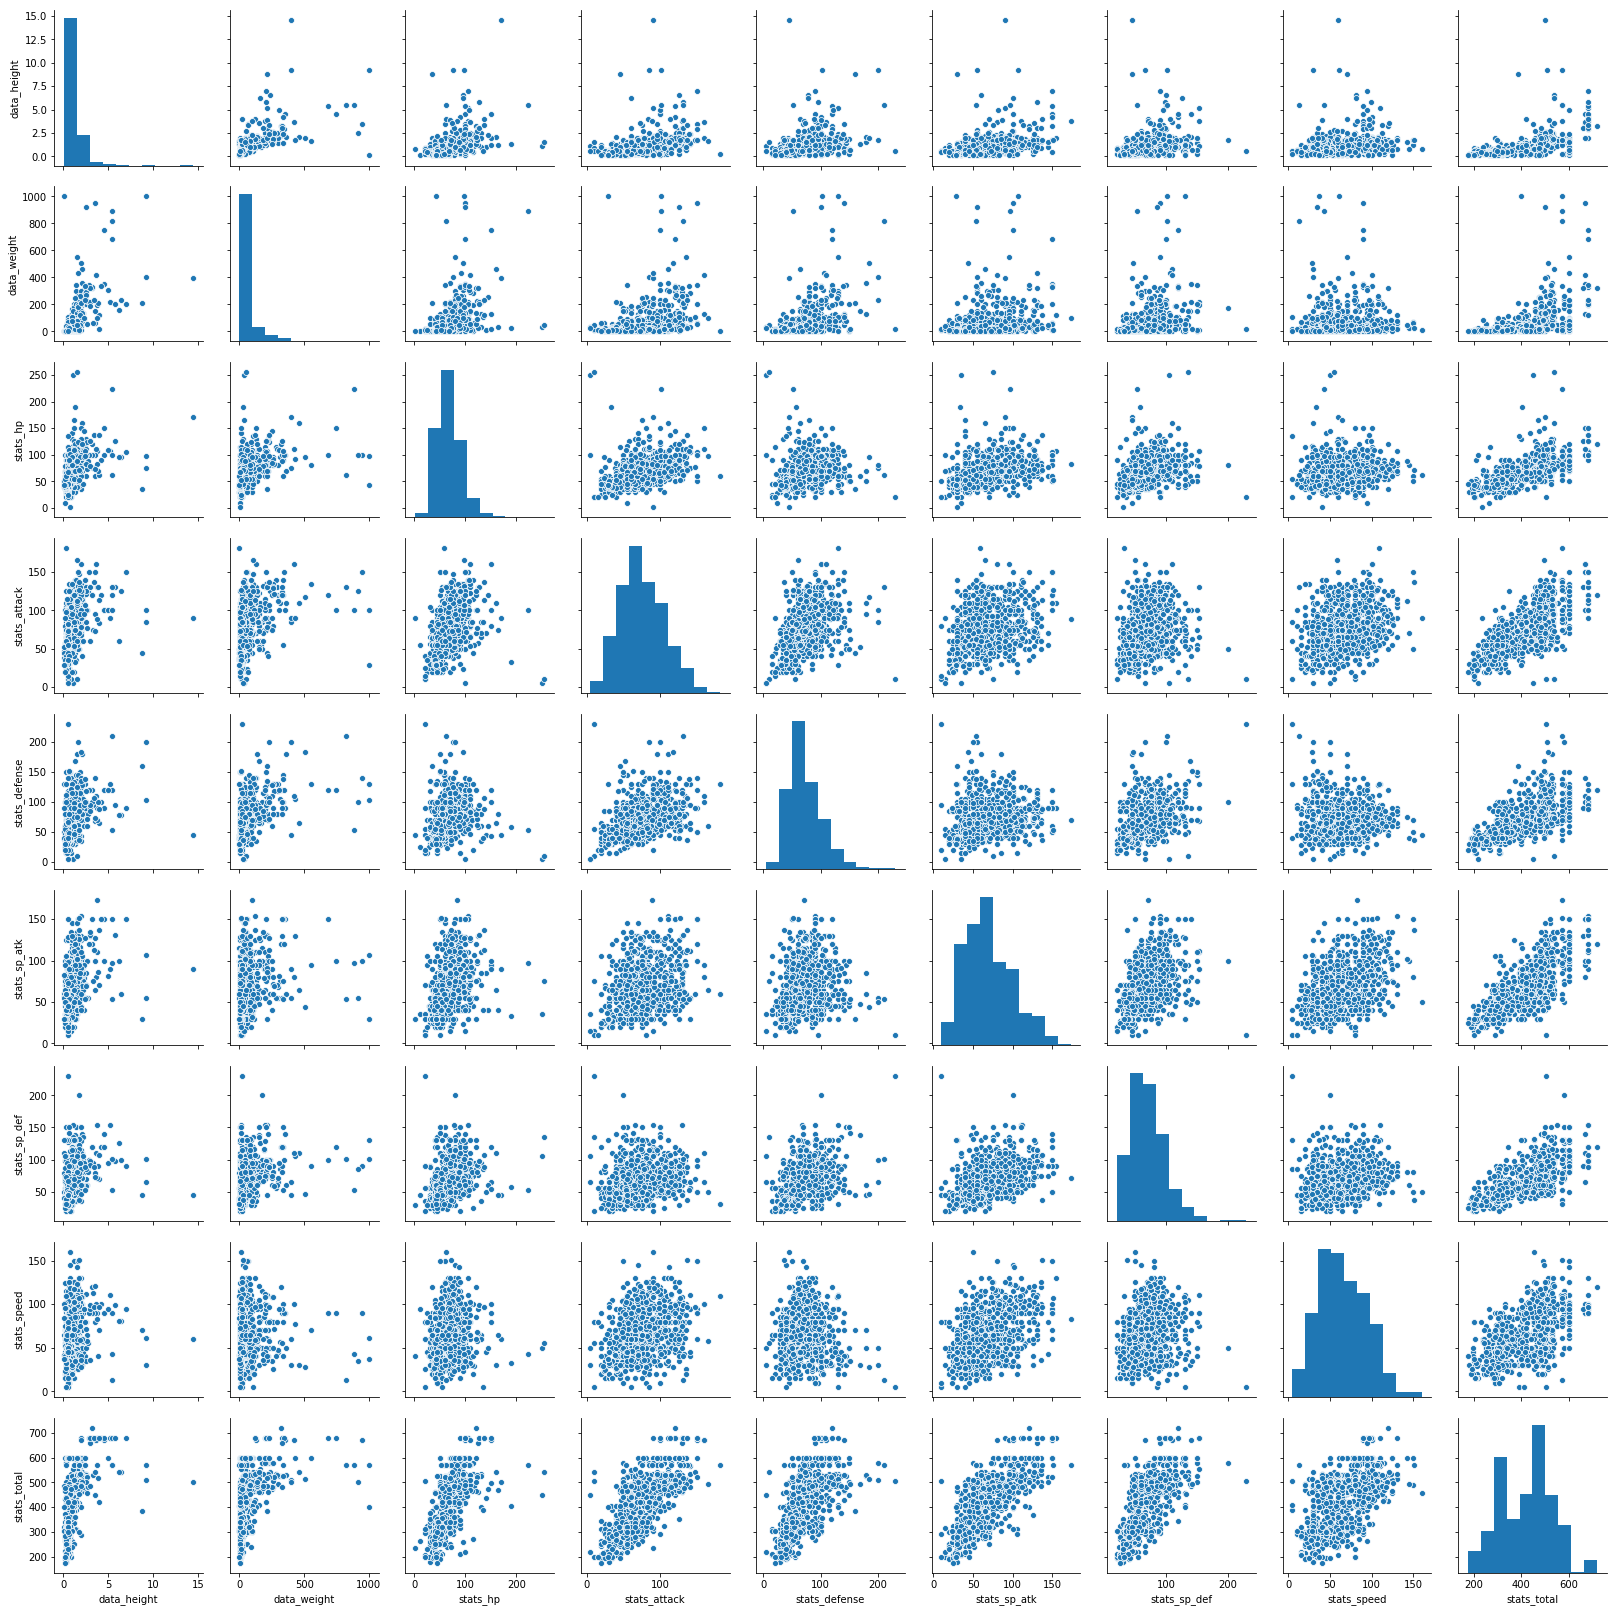

In [101]:
sns.pairplot(df[num_feat])

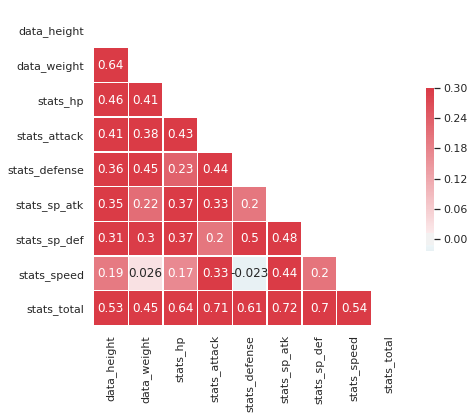

In [102]:
sns.set(style="white")

# Compute the correlation matrix
corr = df[num_feat].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

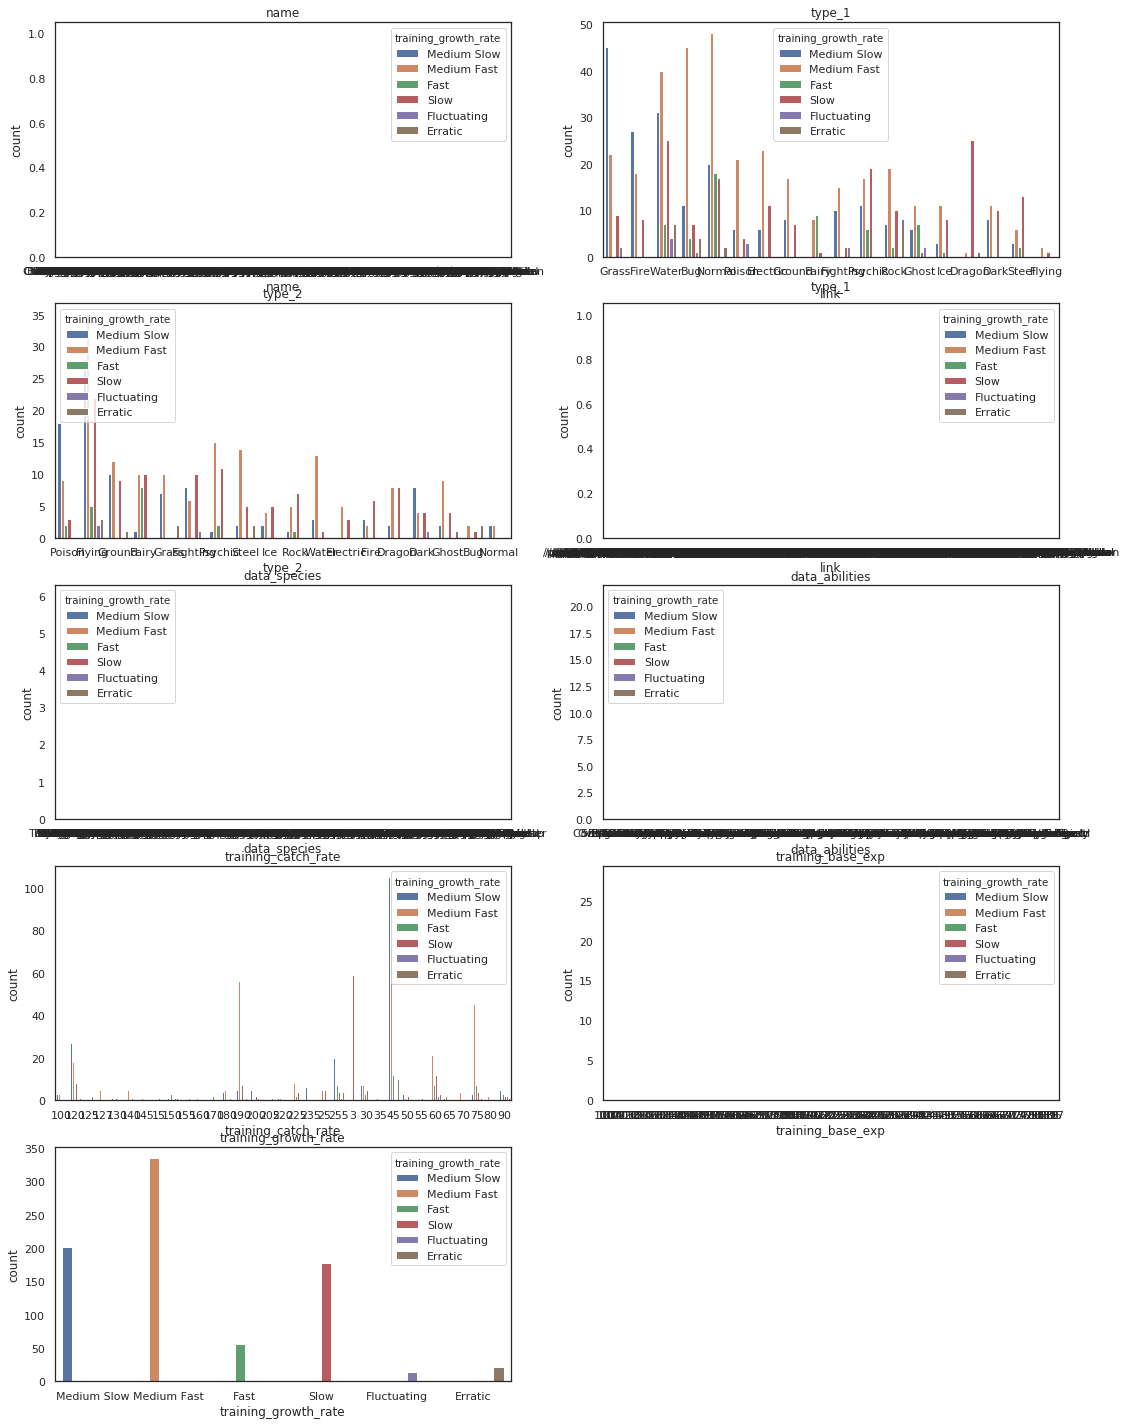

In [104]:
plt.figure(figsize=(18,25))
plt.subplot(521)

i=0
for c in cat_feat:
    plt.subplot(5, 2, i+1)
    i += 1
    sns.countplot(x=c, data=df, hue='training_growth_rate')
    plt.title(c)

plt.show()